# 📘 Marco Teórico: Modelo ARIMA

(Incluye H100 :  Hold 100 days)

## 🎯 Objetivo

El modelo **ARIMA** (AutoRegressive Integrated Moving Average) es una técnica de series de tiempo que permite predecir valores futuros en función de sus propios valores pasados y errores residuales anteriores.

---

## 🧩 Significado de ARIMA(p, d, q)

- **AR (p)**: Parte autorregresiva → la variable depende de sus propios rezagos.
- **I (d)**: Diferenciación → cuántas veces se diferencian los datos para hacer la serie estacionaria.
- **MA (q)**: Promedio móvil → incorpora el error de predicciones pasadas.

---

## 🧮 Estructura general del modelo

El modelo ARIMA combina estas tres partes. Su forma general es:

$$
Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q} + \varepsilon_t
$$

Donde:

- $Y_t$: valor actual de la serie
- $c$: constante (opcional)
- $\phi_i$: coeficientes autorregresivos (AR)
- $\theta_j$: coeficientes del promedio móvil (MA)
- $\varepsilon_t$: término de error aleatorio blanco
- $p$: número de términos autorregresivos
- $d$: número de diferenciaciones
- $q$: número de términos del promedio móvil

---

## 🔁 Diferenciación (componente "I")

Para hacer que una serie sea **estacionaria** (sin tendencia), se aplica la diferenciación:

### Primera diferencia:
$$
Y'_t = Y_t - Y_{t-1}
$$

### Segunda diferencia (si se requiere):
$$
Y''_t = Y'_t - Y'_{t-1}
$$

Esto permite estabilizar la media de la serie y aplicar AR y MA sobre una base estable.

---

## 📏 Selección de parámetros (p, d, q)

- Se suele utilizar **ACF (función de autocorrelación)** y **PACF (función de autocorrelación parcial)** para determinar los valores óptimos de $p$ y $q$.
- El valor de $d$ se incrementa hasta que la serie se vuelva estacionaria (verificada con pruebas como **ADF test**).

---

## 🧮 Evaluación del modelo

El desempeño del modelo se evalúa mediante métricas como:

- **MSE** (Error Cuadrático Medio):
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

- **RMSE** (Raíz del Error Cuadrático Medio):
$$
RMSE = \sqrt{MSE}
$$

Un menor RMSE indica un mejor ajuste del modelo a la serie temporal.

---

## ✅ Aplicaciones

- Predicción de ventas, precios financieros, demanda energética, etc.
- Análisis de series temporales estacionarias y no estacionarias.
- Base para modelos extendidos como **SARIMA**, **ARIMAX**, **VAR**, etc.

---

## 🧠 Conclusión

El modelo ARIMA es una herramienta robusta para modelar y predecir series temporales univariadas, especialmente cuando se logra transformar la serie en una forma **estacionaria**. Sin embargo, su capacidad predictiva se ve limitada en presencia de **alta volatilidad**, **cambios estructurales** o **factores externos no incluidos**.

In [1]:
# !pip install yfinance statsmodels matplotlib pandas scikit-learn --quiet

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import BDay

from IPython.display import display
from datetime import date, datetime

In [2]:
# ------------ 1) Datos ------------
ticker = "MELI" #"PLTR"
start_date = "2020-01-01"
#end_date = "2025-09-23"
end_date = date.today().strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)[["Close"]].dropna()
# multicolumns droplabel
data.columns = data.columns.droplevel(1)

y = data["Close"].copy()
display(y.head(5))
display(y.tail(5))

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02    610.190002
2020-01-03    607.799988
2020-01-06    606.549988
2020-01-07    625.000000
2020-01-08    633.440002
Name: Close, dtype: float64

Date
2026-01-16    2075.010010
2026-01-20    2034.819946
2026-01-21    2057.770020
2026-01-22    2153.750000
2026-01-23    2137.290039
Name: Close, dtype: float64

In [3]:
ultimo = y.tail(1).values[0]
print(f"Last Close Price: ${ultimo:,.3f}")

Last Close Price: $2,137.290


# ARIMA Model training (p, d, q, trend)


In [4]:

# ------------ 2) Ajuste ARIMA(p,d,q) con trend='c' ------------  was: (5,1,0) trend=c ----> 
# 
# p,d,q y trend del arhcivo: TS1101_ARIMA_Parametros.ipynb
# 
# Nota: typ='levels' al predecir porque d=1
model = ARIMA(y, order=(5,1,0), trend='n', 
              enforce_stationarity=False, enforce_invertibility=False)
res = model.fit()

print(res.summary())
print(f"\nAIC: {res.aic:.2f}")


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1523
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7838.136
Date:                Sat, 24 Jan 2026   AIC                          15688.273
Time:                        17:36:23   BIC                          15720.220
Sample:                             0   HQIC                         15700.167
                               - 1523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0145      0.021     -0.684      0.494      -0.056       0.027
ar.L2         -0.0015      0.022     -0.071      0.944      -0.044       0.041
ar.L3         -0.0094      0.023     -0.407      0.6

C:\Users\egarcia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\egarcia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\egarcia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [5]:
# ------------ 3) Predicción dentro de la muestra (in-sample) ------------
# In-sample desde el segundo punto por la diferencia (d=1)
pred_in = res.predict(start=1, end=len(y)-1, typ='levels')
real_in = y.iloc[1:]
pred_in = pred_in.reindex(real_in.index)  # Alinear por seguridad

mse = mean_squared_error(real_in, pred_in)
rmse = float(np.sqrt(mse))
print(f"\n📉 RMSE in-sample ARIMA{model.order} trend='{model.trend}': ${rmse:.4f} USD")

print(f"\n Última Cotización ${ultimo:,.3f}, 2% = ${ultimo*0.02:,.2f}, 5% = ${ultimo*0.05:,.2f}")



📉 RMSE in-sample ARIMA(5, 1, 0) trend='n': $42.3675 USD

 Última Cotización $2,137.290, 2% = $42.75, 5% = $106.86


In [6]:
# ------------ 4) Pronóstico a 100 días hábiles ------------
steps = 100
fc = res.get_forecast(steps=steps)
fc_mean = fc.predicted_mean
fc_ci = fc.conf_int(alpha=0.05)  # Intervalo de Confianza de 95%

# Construir índice futuro en días hábiles
last_date = y.index[-1]
future_idx = pd.bdate_range(last_date + BDay(1), periods=steps)
fc_mean.index = future_idx
fc_ci.index = future_idx
fc_ci.columns = ["Lower_95", "Upper_95"]  # renombrar para claridad

# Tabla rápida (head/tail)
print(f"\n=== PRONÓSTICO {steps} DÍAS (head) ===")
print(pd.concat([fc_mean.rename("Forecast"), fc_ci], axis=1).head())
print(f"\n=== PRONÓSTICO {steps} DÍAS (tail) ===")
print(pd.concat([fc_mean.rename("Forecast"), fc_ci], axis=1).tail())





=== PRONÓSTICO 100 DÍAS (head) ===
               Forecast     Lower_95     Upper_95
2026-01-26  2136.055695  2052.888418  2219.222971
2026-01-27  2134.928269  2018.162195  2251.694342
2026-01-28  2137.182045  1994.585638  2279.778453
2026-01-29  2138.478441  1974.447454  2302.509429
2026-01-30  2138.169425  1954.531567  2321.807284

=== PRONÓSTICO 100 DÍAS (tail) ===
               Forecast     Lower_95     Upper_95
2026-06-08  2138.194179  1316.892646  2959.495712
2026-06-09  2138.194179  1312.616500  2963.771858
2026-06-10  2138.194179  1308.362388  2968.025970
2026-06-11  2138.194179  1304.129974  2972.258384
2026-06-12  2138.194179  1299.918929  2976.469429


C:\Users\egarcia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


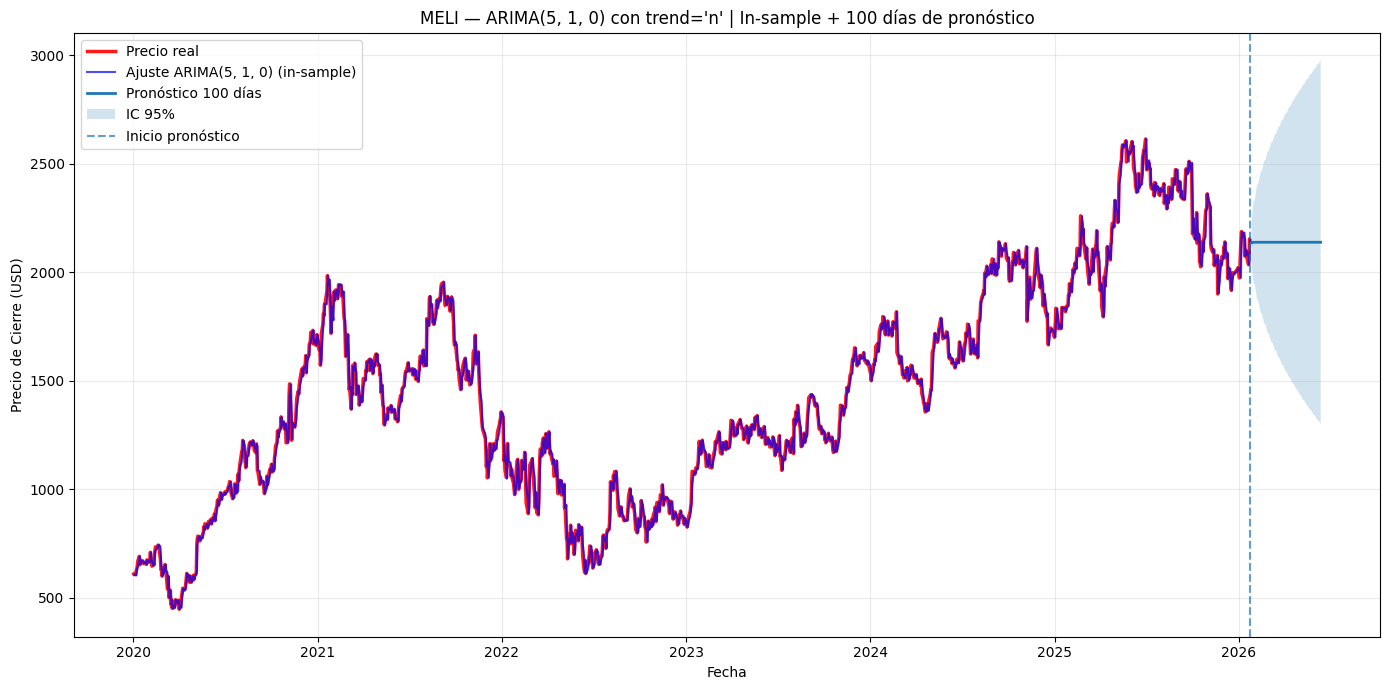

In [7]:

# ------------ 5) Visualización ------------
plt.figure(figsize=(14,7))

# Serie real
plt.plot(
    y.index,
    y.values,
    label="Precio real",
    linewidth=2.5,
    color="red",   # Color de la línea
    alpha=0.9        # Transparencia (0=transparente, 1=opaco)
)
#plt.plot(y.index, y.values, label="Precio real", linewidth=1.5)

# Ajuste in-sample
plt.plot(
    real_in.index,
    pred_in.values,
    label=f"Ajuste ARIMA{model.order} (in-sample)",
    linewidth=1.5,
    color="blue",   # Color de la línea
    alpha=0.7        # Transparencia (0=transparente, 1=opaco)
)
#plt.plot(real_in.index, pred_in.values, label="Ajuste ARIMA(5,1,0) (in-sample)", alpha=0.9)

# Pronóstico futuro
plt.plot(future_idx, fc_mean.values, label=f"Pronóstico {steps} días", linewidth=2)

# Bandas de confianza
plt.fill_between(future_idx, fc_ci["Lower_95"].values, fc_ci["Upper_95"].values,
                 alpha=0.2, label="IC 95%")

# Línea vertical separando histórico y futuro
plt.axvline(x=last_date, linestyle="--", alpha=0.7, label="Inicio pronóstico")

plt.title(f"{ticker} — ARIMA{model.order} con trend='{model.trend}' | In-sample + {steps} días de pronóstico")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

$$ Y_t = 0.0000 + 1.0075 Y_{t-1} + 0.0270 Y_{t-2} - 0.0850 Y_{t-3} + 0.0117 Y_{t-4} + 0.0190 Y_{t-5} + 0.0198 Y_{t-6} + \varepsilon_t $$

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Serie real (cierre ajustado)
y_real = data["Close"]

# Modelo Naive: desplazar la serie en 1 paso
y_naive = y_real.shift(1).dropna()
y_real_aligned = y_real.iloc[1:]  # quitar el primer valor para alinear

# Calcular MSE y RMSE
mse_naive = mean_squared_error(y_real_aligned, y_naive)
rmse_naive = np.sqrt(mse_naive)

print(f"📊 MSE Naive: {mse_naive:.4f}")
print(f"📉 RMSE Naive: {rmse_naive:.4f} USD")

📊 MSE Naive: 1796.6220
📉 RMSE Naive: 42.3866 USD


Recordar comparar el RMSE ARIMA con el RMSE Naive. ARIMA debe tambien ser menor al Naive

## 🧮 Estructura específica del modelo ARIMA(5,1,0)

Dado que el modelo implementado es un ARIMA(5,1,0), su ecuación se deriva de la forma general de ARIMA pero con los parámetros específicos $p=5$, $d=1$ y $q=0$.

Como $d=1$, la serie se diferencia una vez ($Y'_t = Y_t - Y_{t-1}$). Como $q=0$, no hay términos de promedio móvil ($\theta_j = 0$).

La ecuación para la serie diferenciada ($Y'_t$) es:

$$
Y'_t = c + \phi_1 Y'_{t-1} + \phi_2 Y'_{t-2} + \phi_3 Y'_{t-3} + \phi_4 Y'_{t-4} + \phi_5 Y'_{t-5} + \varepsilon_t
$$

Expandiendo $Y'_t = Y_t - Y_{t-1}$, obtenemos la ecuación en términos de la serie original $Y_t$:

$$
Y_t - Y_{t-1} = c + \phi_1 (Y_{t-1} - Y_{t-2}) + \phi_2 (Y_{t-2} - Y_{t-3}) + \phi_3 (Y_{t-3} - Y_{t-4}) + \phi_4 (Y_{t-4} - Y_{t-5}) + \phi_5 (Y_{t-5} - Y_{t-6}) + \varepsilon_t
$$

Reorganizando los términos para $Y_t$:

$$
Y_t = c + (1 + \phi_1) Y_{t-1} + (\phi_2 - \phi_1) Y_{t-2} + (\phi_3 - \phi_2) Y_{t-3} + (\phi_4 - \phi_3) Y_{t-4} + (\phi_5 - \phi_4) Y_{t-5} - \phi_5 Y_{t-6} + \varepsilon_t
$$

Donde:

- $Y_t$: valor actual de la serie de precios
- $c$: constante (estimada por el modelo)
- $\phi_i$: coeficientes autorregresivos (estimados por el modelo)
- $\varepsilon_t$: término de error aleatorio

In [9]:
# Get the estimated coefficients
ar_coeffs = res.arparams
intercept = res.params.get('intercept', 0) # Get intercept if it exists, otherwise 0

# The equation of the differentiated series Y'_t
# Y'_t = c + phi_1 Y'_{t-1} + ... + phi_5 Y'_{t-5} + epsilon_t

# The equation in terms of the original series Y_t is:
# Y_t = c + (1 + phi_1) Y_{t-1} + (phi_2 - phi_1) Y_{t-2} + ... - phi_5 Y_{t-6} + epsilon_t

# Construct and print the equation with estimated coefficients
equation = f"Y_t = {intercept:.4f}"
# The coefficients in the expanded equation are (1+phi_1), (phi_2-phi_1), ..., -phi_5
expanded_coeffs = [1 + ar_coeffs[0]]
for i in range(1, len(ar_coeffs)):
    expanded_coeffs.append(ar_coeffs[i] - ar_coeffs[i-1])
expanded_coeffs.append(-ar_coeffs[-1]) # The last coefficient is -phi_5

for i, coeff in enumerate(expanded_coeffs):
    sign = '+' if coeff >= 0 else '-'
    equation += f" {sign} {abs(coeff):.4f} Y_{{t-{i+1}}}"

equation += " + \varepsilon_t"

print(f"Ecuación del modelo ARIMA{model.order} con coeficientes estimados:")
display(f" {equation} ")

Ecuación del modelo ARIMA(5, 1, 0) con coeficientes estimados:


' Y_t = 0.0000 + 0.9855 Y_{t-1} + 0.0130 Y_{t-2} - 0.0079 Y_{t-3} + 0.0271 Y_{t-4} - 0.0009 Y_{t-5} - 0.0167 Y_{t-6} + \x0barepsilon_t '

Ejercicio: Ver a 100 dias.
Banco MasterCard, VISA
Salud J&J
Tecnologica AMZN
Servicios
Waste Management (desperdicios)